# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

A list of fraction % of the total variance explained by the first k principal components:

k=1 : 16.4%
k=2 : 29.73%
k=3 : 39.9%
k=4 : 46.96%
k=5 : 50.83%
k=10 : 65.22%
k=20 : 80.9%
k=30 : 89.85%
k=40 : 95.09%
k=50 : 98.21%


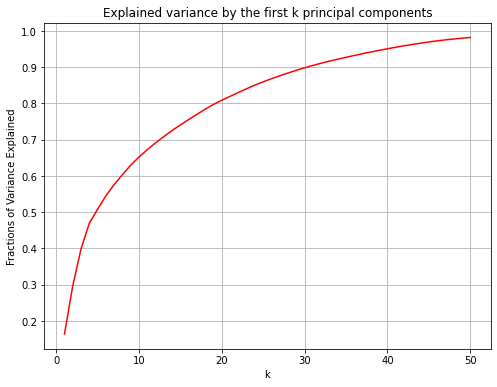

In [35]:
def P1():

### STUDENT START ###
 
    pca = PCA(n_components=50)
    pca.fit(train_data)
    explained_fraction_of_total_variance = np.cumsum(pca.explained_variance_ratio_)#    import pandas as pd

    print ("A list of fraction % of the total variance explained by the first k principal components:\n")
    
    K = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    
    for k in K:
        exp_var= explained_fraction_of_total_variance[k-1]
        print ("k={k} : {exp_var}%".format(k=k, exp_var = round(exp_var*100, 2)))

    plt.figure(figsize=(8, 6))   
    plt.plot(np.arange(1,51),explained_fraction_of_total_variance, c= 'red')
    plt.ylabel('Fractions of Variance Explained') 
    plt.xlabel('k')
    plt.title('Explained variance by the first k principal components')  
    plt.grid()
    plt.show() 

### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

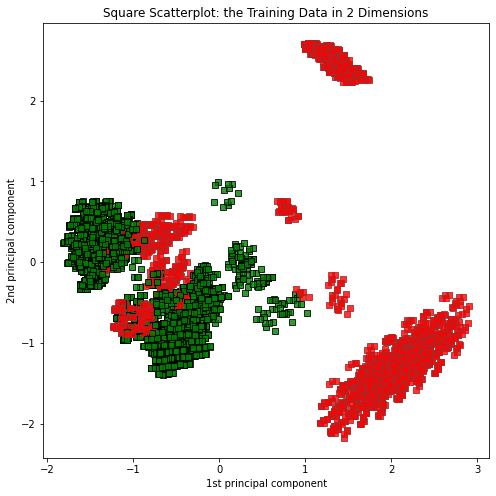

In [31]:
def P2():

### STUDENT START ###


    pc_2 = PCA(n_components=2)

    train_pc = pc_2.fit_transform(train_data)

    plt.figure(figsize=(8, 8))
    colors = np.where(train_labels == 1, 'red', 'green')
    ec = np.where(train_labels == 1, 'brown', 'black')
    plt.scatter(train_pc[:,0], train_pc[:,1], c = colors, alpha = 0.8,  marker='s', edgecolor=ec)
    plt.title("Square Scatterplot: the Training Data in 2 Dimensions")
    plt.xlabel("1st principal component")
    plt.ylabel("2nd principal component")

### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

In [1]:
def P3():

### STUDENT START ###


    def initialize_clusters(points, k):
        return points[np.random.randint(points.shape[0], size=k)]

    def get_distances(centroid, points):
        return np.linalg.norm(points - centroid, axis=1)


    X = PCA(n_components=2).fit_transform(train_data)
    y = train_labels

    k = 6
    maxiter = 50

    #pd.set_option("display.max_rows", None, "display.max_columns", None)

    centroids = initialize_clusters(X, k)
    classes = np.zeros(X.shape[0], dtype=np.float64)
    distances = np.zeros([X.shape[0], k], dtype=np.float64)
    circle = np.zeros([X.shape[0]], dtype=np.float64)
    colors = np.where(train_labels == 1, 'red', 'green')
    #fig, ax = plt.subplots(figsize=(10,10))
    max_distance = np.zeros(6, dtype=np.float64)

    for i in range(maxiter):
        for i, c in enumerate(centroids):
            distances[:, i] = get_distances(c, X)
        classes = np.argmin(distances, axis=1)
        for c in range(k):
            centroids[c] = np.mean(X[classes == c], 0)
            max_distance[c] = get_distances(centroids[c] , X[classes == c]).max()

    colors = np.where(train_labels == 1, 'red', 'green')
    group_colors = ['blue', 'skyblue', 'coral', 'lightgreen','darkred', 'green']
    colors1 = [group_colors[j] for j in classes]
    ec = np.where(train_labels == 1, 'brown', 'black')

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(X[:,0], X[:,1], color=colors,  alpha= 0.5, marker='s', edgecolor=ec)
    ax.scatter(centroids[:,0], centroids[:,1], color=group_colors,  marker='s', lw=2,  edgecolor=ec) 
    for i in range(len(centroids)):
        circle = plt.Circle(centroids[i], max_distance[i], facecolor="None", edgecolor=group_colors[i], clip_on=True)
        ax.add_patch(circle)
        ax.set_xlabel('$x_0$')
        ax.set_ylabel('$x_1$');

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(X[:,0], X[:,1], color=colors1, alpha= 0.25, marker='s', edgecolor=group_colors )
    ax.scatter(centroids[:,0], centroids[:,1], color='black', marker='s', lw=2, edgecolor=group_colors )
    for i in range(len(centroids)):
        circle = plt.Circle(centroids[i], max_distance[i], facecolor="None", edgecolor=group_colors[i], clip_on=True)
        ax.add_patch(circle)
        ax.set_xlabel('$x_0$')
        ax.set_ylabel('$x_1$');
    plt.xlabel("1st principal component")
    plt.ylabel("2nd principal component")
 
### STUDENT END ###

 
P3()



NameError: name 'PCA' is not defined

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

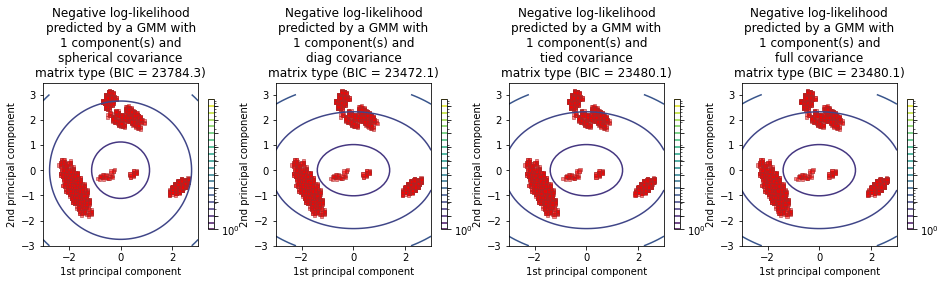

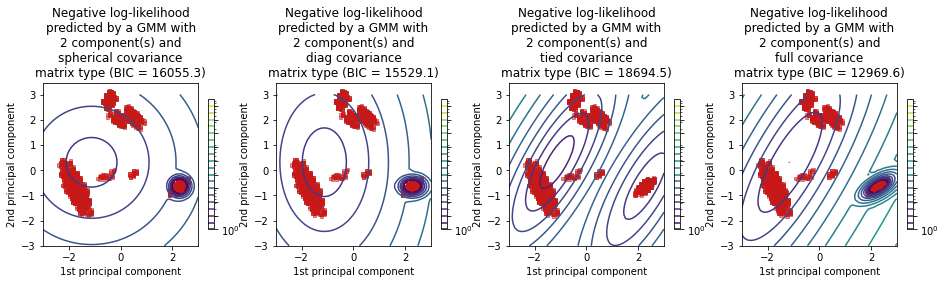

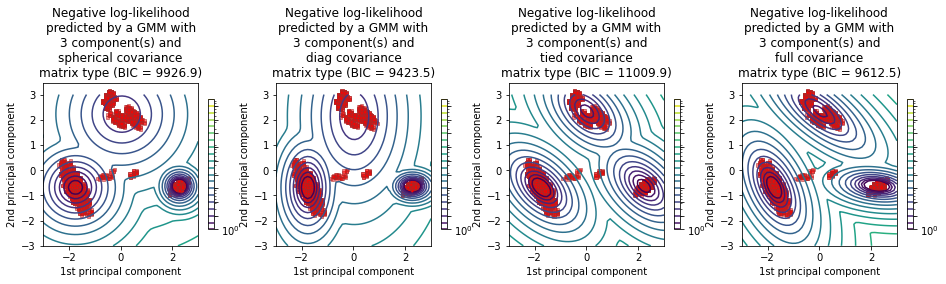

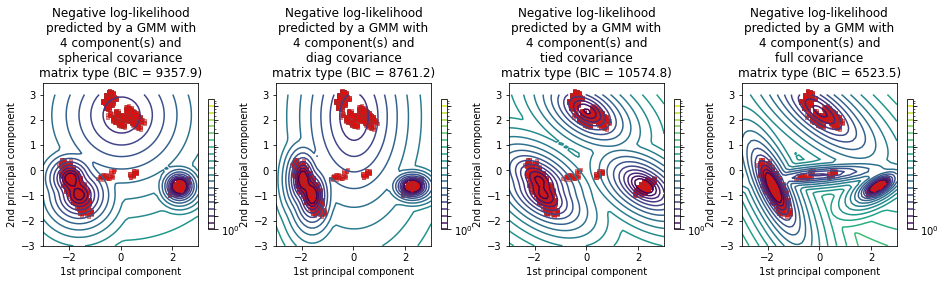

In [87]:
def P4():
### STUDENT START ###
 
    def GMM_plot(X_2D, labels, comp, covar):
        if not isinstance(covar, list):
            temp = []
            temp.append(covar)
            covar = temp
        plt.figure(figsize = (4*len(covar), 3))
        for i,c in enumerate(covar):
            model = GaussianMixture(n_components=comp, covariance_type=c,random_state=12345)
            model.fit(X_2D[labels==1])
            x = np.linspace(-3.0, 3.0)
            y = np.linspace(-3.0, 3.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -model.score_samples(XX)
          
            Z_shape =  int(np.sqrt(len(Z)))
            Z = Z.reshape(Z_shape,Z_shape)
          
            ax = plt.subplot(1, len(covar), i+1 )
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 3, 20))
   #         CS = plt.contour(X, Y, Z)

        
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            colors = np.where(labels == 1, 'red', 'green')
            ecolors = np.where(labels == 1, 'brown', 'darkgreen')
            plt.scatter(train_pc[:,0], train_pc[:,1], linewidth=1, marker='s', c = colors, alpha = 0.5, s = 10, 
                        edgecolor = ecolors )
            plt.title('Negative log-likelihood\npredicted by a GMM with\n{0} component(s) and'
                      '\n{1} covariance\nmatrix type (BIC = {2:.1f})'.\
                      format(comp, c, model.bic(X_2D)))
            plt.xlabel("1st principal component")
            plt.ylabel("2nd principal component")
            plt.axis('tight')
      
    pc_2 = PCA(n_components=2)
    train_d = train_data[train_labels==1]
    train_l = train_labels[train_labels==1]
    train_pc = pc_2.fit_transform(train_d)
    
    for comp in range(1,5):
        GMM_plot(train_pc, train_l, comp, ['spherical', 'diag', 'tied', 'full'])
        
        
### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

Accuracy: 0.9501779359430605

Predicted log-likelihood values: warmer colors indicate higher certainty of prediction.


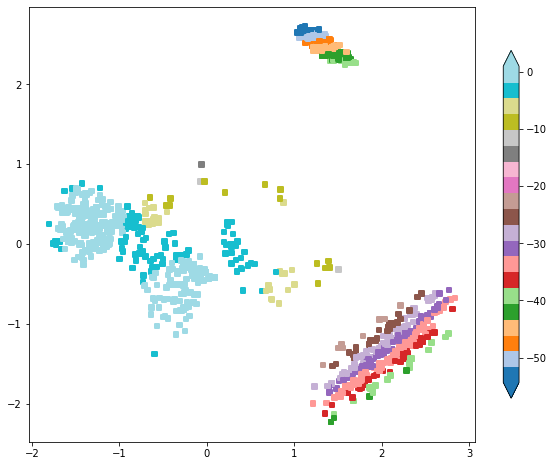

In [88]:
def P5():

### STUDENT START ###
 
    pca2 = PCA(n_components=2)
    pca2_train = pca2.fit_transform(train_data)
    pca2_test = pca2.transform(test_data)
    pca2_pos = pca2_train[train_labels==1]
    pca2_neg = pca2_train[train_labels==0]
    
    model = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
 
    pos = model.fit(pca2_pos)
    pos_loglik = pos.score_samples(pca2_test)
    neg = model.fit(pca2_neg)
    neg_loglik = neg.score_samples(pca2_test)
    pred_labels = pos_loglik>neg_loglik
    accuracy = float(np.sum(test_labels==pred_labels))/len(test_labels)

    print ('Accuracy: {acc}'.format(acc=accuracy))
    plt.figure(figsize=(10, 8))
    pred_loglik = pos_loglik if pred_labels is 1 else neg_loglik
    scatter_plot = plt.scatter(pca2_test[:,0], pca2_test[:,1], c=pred_loglik, 
                     marker="s", alpha=1, s=20, lw=2, cmap='tab20') 
    cbar = plt.colorbar(scatter_plot, shrink=0.8, extend='both')
    print ('\nPredicted log-likelihood values: warmer colors indicate higher certainty of prediction.')
    plt.show()
 
 
### STUDENT END ###

P5()

### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [89]:
def P6():
    
### STUDENT START ###
                
    import pandas as pd
    
    class GMFitter(): 
                
        def __init__(self,num_pca,num_gmm,cov_type):
            self.num_class = 2
            self.num_pca = num_pca
            self.num_gmm = num_gmm
            self.cov_type = cov_type
            if self.cov_type is 'tied':
                self.num_parameters = (self.num_pca*self.num_gmm + 
                                       self.num_pca*(self.num_pca+1)/2)*self.num_class            
            elif self.cov_type is 'full':
                self.num_parameters = (self.num_pca*self.num_gmm + 
                                       self.num_gmm*self.num_pca*(self.num_pca+1)/2)*self.num_class            
            elif self.cov_type is 'diag':
                self.num_parameters = (self.num_pca*self.num_gmm + 
                                       self.num_gmm*self.num_pca)*self.num_class              
            elif self.cov_type is 'spherical':
                self.num_parameters = (self.num_pca*self.num_gmm + self.num_gmm)*self.num_class       
            else:
                print('error cov_type')                
                            
        def fit(self,train_data,test_data,train_labels,test_labels):
            pca = PCA(n_components=self.num_pca)
            pca_train = pca.fit_transform(train_data)
            pca_test = pca.transform(test_data)
            
            model = GaussianMixture(n_components=self.num_gmm, covariance_type=self.cov_type)
            pca_pos = pca_train[train_labels==1]
            pca_neg = pca_train[train_labels==0]
            gmm_pos = model.fit(pca_pos)
            pos_loglik = gmm_pos.score_samples(pca_test)
            gmm_neg = model.fit(pca_neg)
            neg_loglik = gmm_neg.score_samples(pca_test)
            pred_labels = pos_loglik>neg_loglik
            accuracy = float(np.sum(test_labels==pred_labels))/len(test_labels)
            return accuracy
 
    cov_types = ['spherical','diag','tied','full']
    pcas = np.arange(1,25) 
    gmms = np.arange(1,25) 
    results = []  
  
    for cov_type in cov_types:
        for num_pca in pcas:
            for num_gmm in gmms:
                gmm = GMFitter(num_pca,num_gmm,cov_type) 
                if gmm.num_parameters <= 50:
                    acc = gmm.fit(train_data,test_data,train_labels,test_labels)
                    results.append([str(num_pca),str(num_gmm),str(cov_type),int(gmm.num_parameters), acc])

                    
    print( 'Below is the table ranked by accuracy along with the model setup:\n')     
    print( 'Rank #1 shows the best accuracy and the model setup:\n\n ')  
    
    tb =  pd.DataFrame(results, columns =['num_PCA','num_GMM ','CovarianceType','num_Parameters','Accuracy'] )
    tb['Rank'] = tb['Accuracy'].rank(ascending=False).astype(np.int64)
    tb.sort_values("Rank", inplace = True) 
    tb =  tb[['Rank', 'Accuracy','num_PCA','num_GMM ','CovarianceType','num_Parameters']]
    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 5,
                       ):
        print(tb.to_string(index=False))

### STUDENT END ###

P6()

Below is the table ranked by accuracy along with the model setup:

Rank #1 shows the best accuracy and the model setup:

 
 Rank  Accuracy num_PCA num_GMM  CovarianceType  num_Parameters
    1   0.97331       7        3      spherical              48
    2   0.97242       5        2           tied              50
    3   0.96975       4        3           tied              44
    4   0.96797       6        3      spherical              42
    4   0.96797       5        4      spherical              48
    6   0.96619       5        3      spherical              36
    7   0.96263       3        4           diag              48
    8   0.95819       3        6           tied              48
    9   0.95730       4        4      spherical              40
    9   0.95730       2        5           full              50
   11   0.95641       3        5      spherical              40
   11   0.95641       3        4      spherical              32
   13   0.95463       2       11           ti